# Ejercicios Iris Setosa

## Extracción de Datos

### 3.1.Cargue los datos iris en un data frame (pandas) e imprima la descripción de los datos (columnas y
renglones), tipo y las 10 primeras filas de los datos. Fuente de datos:
https://archive.ics.uci.edu/ml/datasets/Iris.

In [1]:
import pandas as pd
df = pd.read_csv('Sources/EjerciciosIris/irisH.data')

# Descripciónn de datso
print(f"DESCRIPCIÓN:\n[*] Renglones: {df.axes[0]}\n[*] Columnas: {df.axes[1]}")

print("\nTIPOS DE DATOS POR COLUMNA\n")
print(df.dtypes, "\n")

print("PRIMEROS 10 RENGLONES")
print(df.head(10))


DESCRIPCIÓN:
[*] Renglones: RangeIndex(start=0, stop=150, step=1)
[*] Columnas: Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

TIPOS DE DATOS POR COLUMNA

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Class           object
dtype: object 

PRIMEROS 10 RENGLONES
   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          NaN         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-seto

### 3.2.Imprima las llaves y el número de filas y de columnas.

In [2]:
print("No. Columnas:", df.shape[1])
print("No. Filas:", df.shape[0])

print(f"\nLlaves (Columnas): {list(df.columns)}")

No. Columnas: 5
No. Filas: 150

Llaves (Columnas): ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']


### 3.3.Obtenga el número de muestras faltantes o Nan.

In [3]:
rowsMissing = df.isna().all(axis=1).sum()
rowsAtLeastOneNaN = df.isna().any(axis=1).sum()

print(f"Muestras Faltantes: {rowsMissing}")
print(f"Muestras con NaN: {rowsAtLeastOneNaN}")
print(f"Total de muestras: {rowsAtLeastOneNaN+rowsMissing}")

Muestras Faltantes: 0
Muestras con NaN: 3
Total de muestras: 3


#### 3.4.Cree un arreglo 2-D de tamaño 5x5 con unos en la diagonal y ceros en el resto. Convierta el arreglo NumPy a una matriz dispersa de ScyPy en formato CRS. Nota: una matriz se considera dispersa cuando el porcentaje de ceros es mayor a 0.5.

In [5]:
import numpy as np
from scipy.sparse import csr_matrix

# Matriz identidad
matriz = np.eye(5)

# Formato CSR (Compressed Sparse Row)
matriz_dispersa = csr_matrix(matriz)

print(matriz)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


#### 3.5.Muestre estadísticas básicas como percentil, media, mínimo, máximo y desviación estándar de los datos. Use describe para ello. Imprima sólo la media y la desviación estándar.

In [6]:
stats = df.describe()

print(f"ESTADISTICAS BÁSICAS:\n {stats} \n")


print(f"MEDIA:\n{stats.loc['mean']}\n")
print(f"DESVIACIÓN ESTANDAR:\n{stats.loc['std']}")

ESTADISTICAS BÁSICAS:
        SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   150.000000  149.000000
mean      5.848322    3.051007     3.758667    1.205369
std       0.828594    0.433499     1.764420    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000 

MEDIA:
SepalLength    5.848322
SepalWidth     3.051007
PetalLength    3.758667
PetalWidth     1.205369
Name: mean, dtype: float64

DESVIACIÓN ESTANDAR:
SepalLength    0.828594
SepalWidth     0.433499
PetalLength    1.764420
PetalWidth     0.761292
Name: std, dtype: float64


#### 3.6.Obtenga el número de muestras para cada clase.
#### 3.7.Añada un encabezado a los datos usando los nombres en iris.names y repita el ejercicio anterior.

In [7]:
clases_unicas = df['Class'].unique()

# Crear un diccionario donde cada clave es una clase y el valor es el DataFrame correspondiente
dfs_por_clase = {clase: df[df['Class'] == clase] for clase in clases_unicas}


# Imprimir el número de muestras por clase
for clase, df_clase in dfs_por_clase.items():
    print(f"{clase} -> muestras: {len(df_clase)}")


Iris-setosa -> muestras: 50
Iris-versicolor -> muestras: 50
Iris-virginica -> muestras: 50


#### 3.8.Imprima las diez primeras filas y las dos primeras columnas del data frame usando los índices de las columnas.

In [8]:
for clase in dfs_por_clase.values():
    print(clase.iloc[:10, :2],'\n')  # Primeras 10 filas y primeras 2 columnas

   SepalLength  SepalWidth
0          NaN         3.5
1          4.9         3.0
2          4.7         3.2
3          4.6         3.1
4          5.0         3.6
5          5.4         3.9
6          4.6         3.4
7          5.0         3.4
8          4.4         2.9
9          4.9         3.1 

    SepalLength  SepalWidth
50          7.0         3.2
51          6.4         3.2
52          6.9         3.1
53          5.5         2.3
54          6.5         2.8
55          5.7         2.8
56          6.3         3.3
57          4.9         2.4
58          6.6         2.9
59          5.2         2.7 

     SepalLength  SepalWidth
100          6.3         3.3
101          5.8         2.7
102          7.1         3.0
103          6.3         2.9
104          6.5         3.0
105          7.6         3.0
106          4.9         2.5
107          7.3         2.9
108          6.7         2.5
109          7.2         3.6 



## Vizualización

#### 3.9.Cree una gráfica de barras que muestre la media, mínimo y máximo de todos los datos.

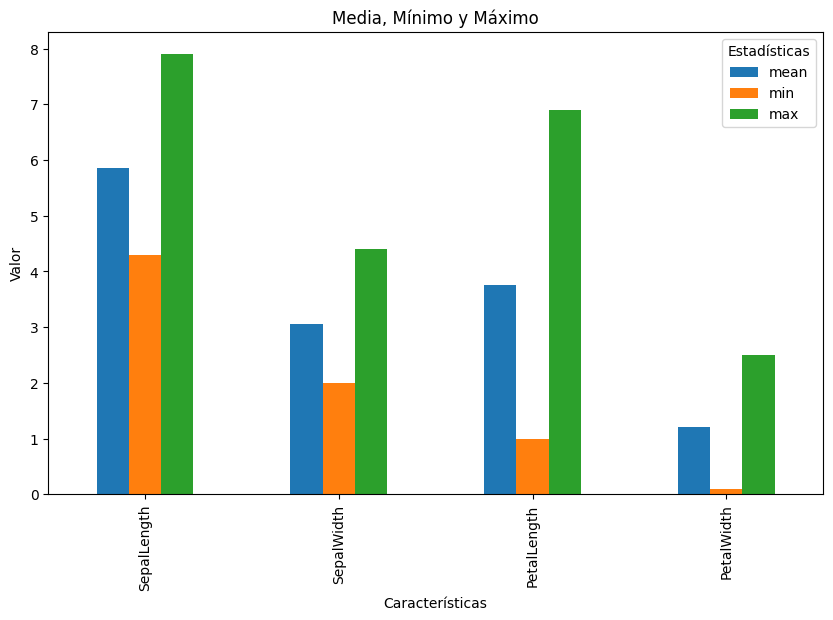

In [9]:
import matplotlib.pyplot as plt
stats.loc[['mean', 'min', 'max']].T.plot(kind='bar', figsize=(10, 6))  

plt.title('Media, Mínimo y Máximo')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.legend(title="Estadísticas")
plt.show()

#### 3.10. Muestre la frecuencia de las tres especies como una gráfica de pastel.

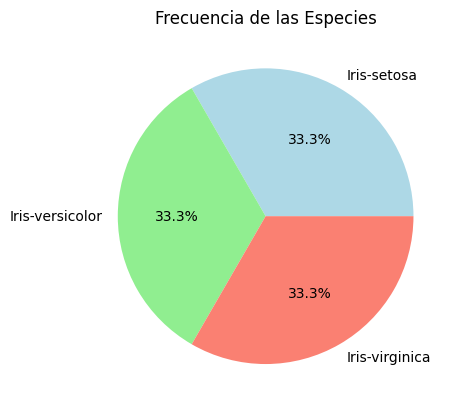

In [10]:
# Obtener el número de muestras por clase desde el diccionario
conteos_clases = {clase: len(df_clase) for clase, df_clase in dfs_por_clase.items()}

# Graficar
plt.pie(conteos_clases.values(), labels=conteos_clases.keys(), autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Frecuencia de las Especies')
plt.show()


#### 3.11. Cree una gráfica que muestre la relación entre la longitud y ancho del sépalo de las tres especies conjuntamente.

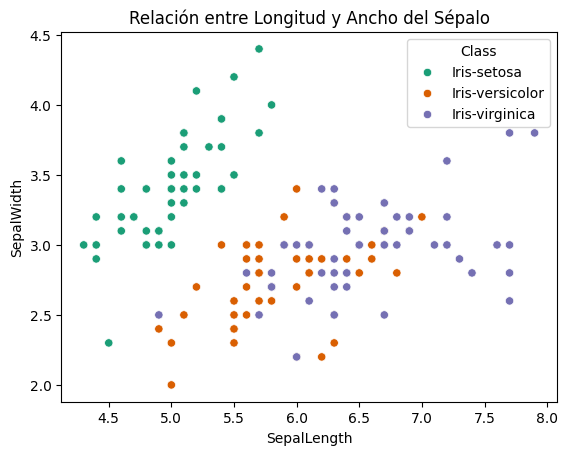

In [11]:
import seaborn as sns

sns.scatterplot(data=df, x="SepalLength", y="SepalWidth", hue="Class", palette="Dark2")  
plt.title("Relación entre Longitud y Ancho del Sépalo")  
plt.show()

#### 3.12. Obtenga los histogramas de las variables SepalLength, SepalWidth, PetalLength y PetalWidth.

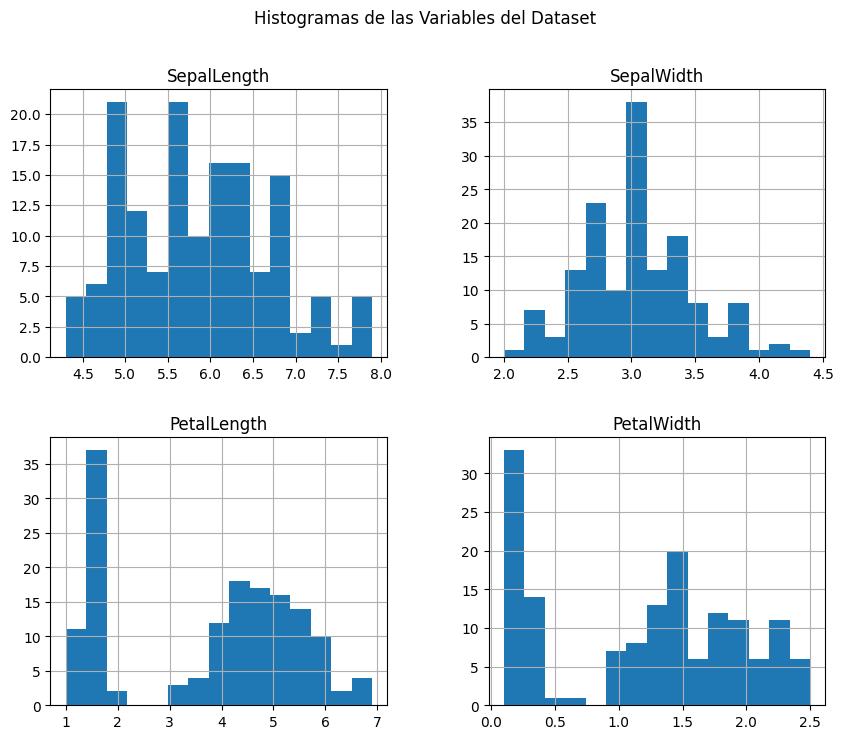

In [12]:
df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].hist(figsize=(10, 8), bins=15)  
plt.suptitle('Histogramas de las Variables del Dataset')  
plt.show()

#### 3.13. Cree gráficas de dispersión usando pairplot de seaborn y muestre con distintos colores las tres especies en las gráficas de dispersión.

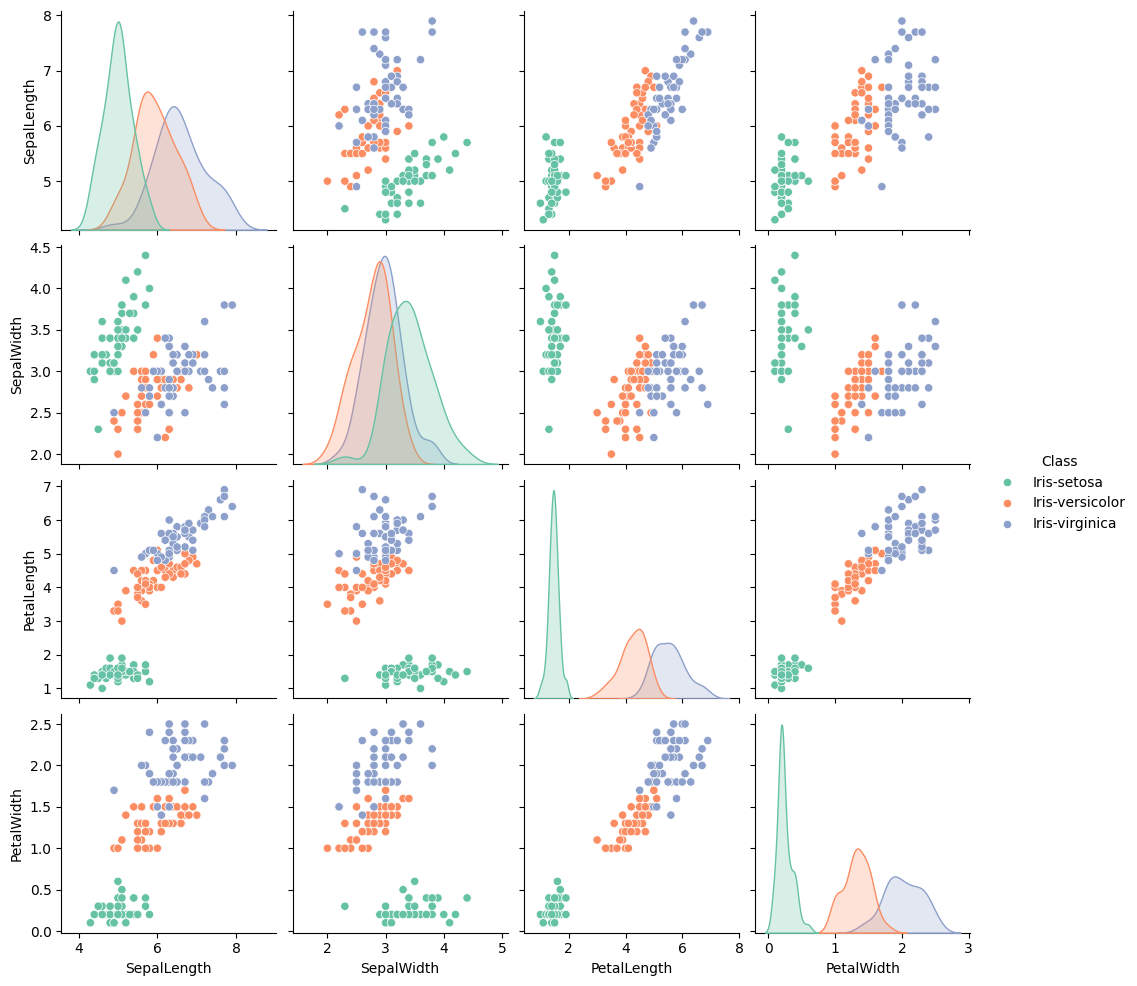

In [13]:
sns.pairplot(df, hue="Class", palette="Set2")  
plt.show()

#### 3.14. Cree una gráfica usando joinplot de seaborn para mostrar la dispersión entre la longitud y ancho del sépalo y las distribuciones de estas dos variables.

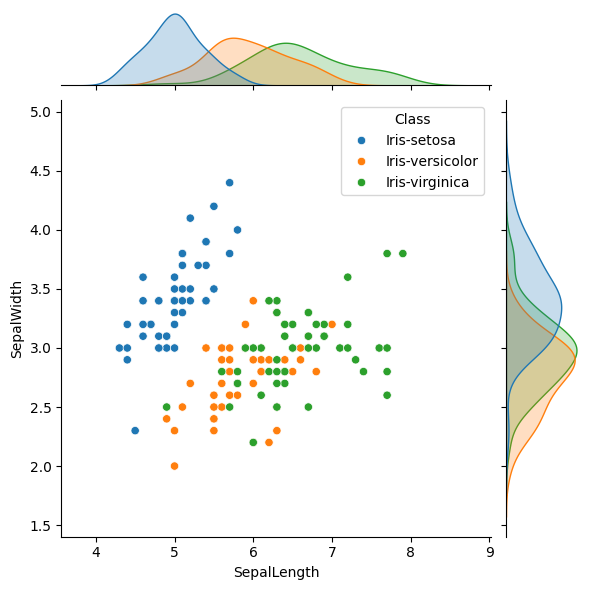

In [14]:
sns.jointplot(data=df, x="SepalLength", y="SepalWidth", hue="Class", kind="scatter")  
plt.show()

#### 3.15. Repita el ejercicio anterior, pero esta vez usando joinplot con kind="hex".

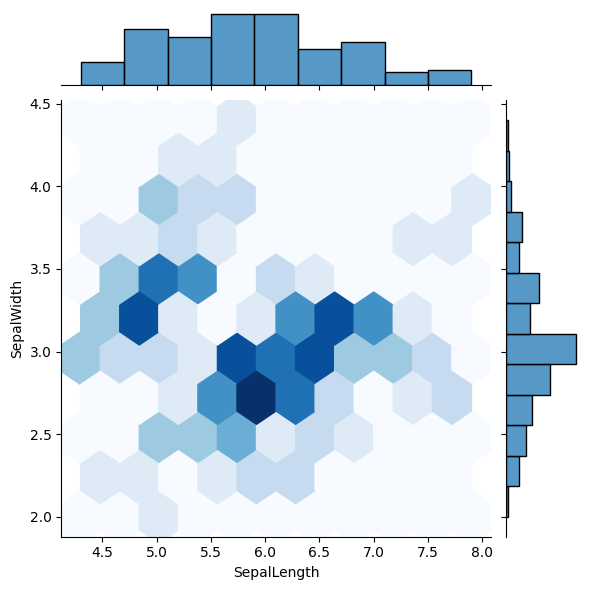

In [15]:
sns.jointplot(data=df, x="SepalLength", y="SepalWidth", kind="hex", cmap="Blues")  
plt.show()

#### 3.16. A la imagen de Iris que se anexa, en la zona morada del pétalo describa como puede obtener su valor promedio y su desviación estándar?

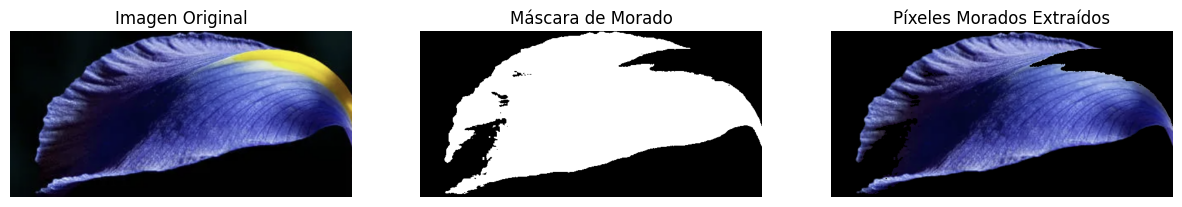

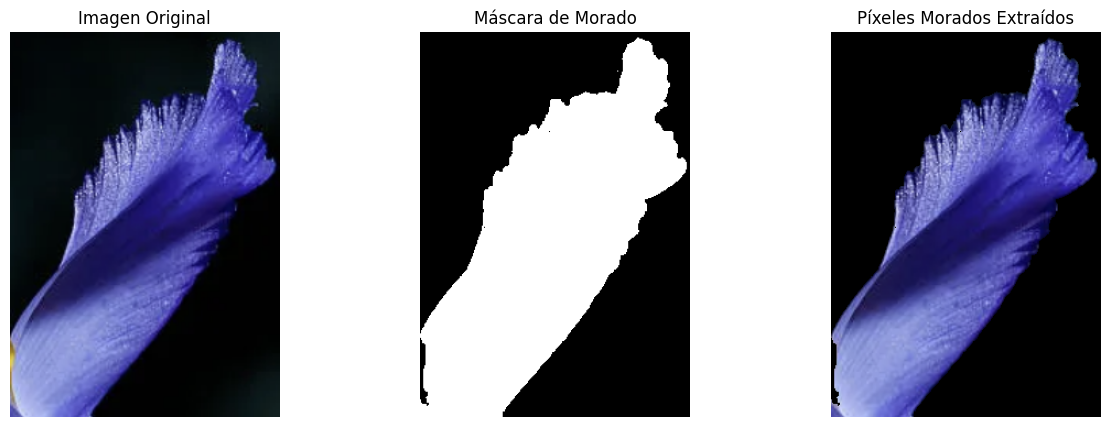

MEDIA:
SepalLength: 57.000000
SepalWidth: 109.000000
PetalLength: 173.000000
PetalWidth: 121.500000

DESVIACIÓN ESTÁNDAR:
SepalLength: 107.508139
SepalWidth: 212.003774
PetalLength: 172.000000
PetalWidth: 120.500000


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Calcular estadísticas
def calcular_estadisticas(valores):
    return np.mean(valores), np.std(valores)

def analizar(imagen_rgb):
    # Convertir a HSV
    imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)
    
    # Definir el rango del color morado en HSV
    lower_purple = np.array([110, 40, 40])  # Ajustar según la imagen
    upper_purple = np.array([160, 255, 255])
    
    # Crear una máscara para el color morado
    mascara_morado = cv2.inRange(imagen_hsv, lower_purple, upper_purple)
    
    # Aplicar la máscara para extraer solo los píxeles morados
    pixeles_morados = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_morado)
    
    # Encontrar contornos de las áreas moradas
    contornos, _ = cv2.findContours(mascara_morado, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Lista para almacenar los tamaños de sépalos y pétalos
    ancho = []
    alto = []
    
    # Clasificar los contornos en pétalos o sépalos según su tamaño
    for contorno in contornos:
        x, y, w, h = cv2.boundingRect(contorno)  # Obtener el rectángulo delimitador
        
        ancho.append(w)
        alto.append(h)
    
    # Visualizar resultados
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(imagen_rgb)
    ax[0].set_title("Imagen Original")
    ax[0].axis("off")

    ax[1].imshow(mascara_morado, cmap="gray")
    ax[1].set_title("Máscara de Morado")
    ax[1].axis("off")

    ax[2].imshow(pixeles_morados)
    ax[2].set_title("Píxeles Morados Extraídos")
    ax[2].axis("off")
    
    plt.show()
    # Media y desviación estándar
    return (calcular_estadisticas(ancho), calcular_estadisticas(alto))

# Cargar la imagen en BGR
imagen = cv2.imread("Images/iris.png")

# Convertir a RGB y luego a HSV
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

x_s_start, y_s_start, x_s_end, y_s_end = 0, 216, 574, 494

# Coordenadas del PÉTALO (ajusta según la imagen)
x_p_start, y_p_start, x_p_end, y_p_end = 574, 45, 819, 395

# Recortar cada parte
sepal_ndarray = imagen_rgb[y_s_start:y_s_end, x_s_start:x_s_end]
petal_ndarray = imagen_rgb[y_p_start:y_p_end, x_p_start:x_p_end]

sepal_ancho, sepal_alto = analizar(sepal_ndarray)
petal_ancho, petal_alto = analizar(petal_ndarray)
# Media y desviación estándar
media_sepal_length, std_sepal_length = sepal_alto
media_sepal_width, std_sepal_width = sepal_ancho
media_petal_length, std_petal_length = petal_alto
media_petal_width, std_petal_width = petal_ancho

# Mostrar resultados
print("MEDIA:")
print(f"SepalLength: {media_sepal_length:.6f}")
print(f"SepalWidth: {media_sepal_width:.6f}")
print(f"PetalLength: {media_petal_length:.6f}")
print(f"PetalWidth: {media_petal_width:.6f}")

print("\nDESVIACIÓN ESTÁNDAR:")
print(f"SepalLength: {std_sepal_length:.6f}")
print(f"SepalWidth: {std_sepal_width:.6f}")
print(f"PetalLength: {std_petal_length:.6f}")
print(f"PetalWidth: {std_petal_width:.6f}")